<a href="https://colab.research.google.com/github/joaovictorfonseca/data_science_joao_fonseca/blob/master/Analisando_os_dados_do_Airbnb_em_Berlim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0- Projeto 01**
*by João Victor Fonseca*

---

# Análise dos Dados do Airbnb - *Berlim*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlim, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Iremos utilizar dados disponibilizados pela própria Airbnb acerca dos lugares disponíveis para aluguel ,pela plataforma, na cidade de Berlim, Alemanha. Os dados englobam as locações no período de ________

Utilizaremos as bibliotecas pandas para trabalhar com a tabela de dados, matplotlib para criar gráficos de informações a cerca dos dados e seaborn para estilizarmos os gráficos e tornar visualizações mais claras e limpas.


In [0]:
# importando os pacotes que serão utilizados
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


Utilizando o pandas para trabalhar com o dataframe disponibilizado no link:

In [0]:
df= pd.read_csv('http://data.insideairbnb.com/germany/be/berlin/2020-05-14/visualisations/listings.csv')

Analisamos as primeiras entradas para entender como o dataset foi montado

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,60,4,132,2020-04-03,2.65,7,180
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.09,1,0
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.33,1,364
3,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.24,2,78
4,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53303,13.41605,Entire home/apt,180,6,8,2020-01-04,0.14,1,0


## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - demarca a divisão administrativa do imóvel
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias



Algumas informações não serão utilizadas pois não se enquadram para uma análise geral, como 'name', 'host_id', 'host_name', 'neighbourhood_group' e algumas outras porém vamos deixá-las no nosso dataframe caso no futuro haja necessidade de analisá-las.

### **Quantas variáveis e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos ferificar o número de colunas e linhas do nosso dataset:

In [4]:
print("Linhas:\t {}".format(df.shape[0]))
print("Colunas:\t {}".format(df.shape[1]))


Linhas:	 24678
Colunas:	 16


Isso nos diz que temos 24678 localidades disponíveis(ou que já estiveram em algum momento) em Berlim, e cada uma dessas é definida por 16 características, dadas no dicionário de variáveis.

### **Qual a porcentagem de valores ausentes no *dataset*?**

Precisamos analisar a quantidade de valores faltantes no nosso dataframe, de modo que possamos evitar analises equivocadas acerca da variável que possuir um número relativamente alto de dados faltantes (NaN). Na célula abaixo estarão a porcentagem de valores faltantes em cada coluna:

In [5]:
df.isna().sum()*100/(df.shape[0])


id                                 0.000000
name                               0.202610
host_id                            0.000000
host_name                          0.085096
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       18.380744
reviews_per_month                 18.380744
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

Podemos ver que só há uma deficiência considerável de informações nas variáveis 'last_review' e 'reviews_per_month' que chega a 18.4% de valores faltantes, porém isto não atrapalhará nossa análise, visto que não devemos focar em tais variáveis.

### **Qual o tipo de distribuição das variáveis?** 

Para ter uma visão geral acerca das colunas utilizadas, plotaremos um histograma para cada coluna. O comando sns.set() estiliza nossos gráficos, lembrando que os histogramas só são utilizados para variáveis numéricas .

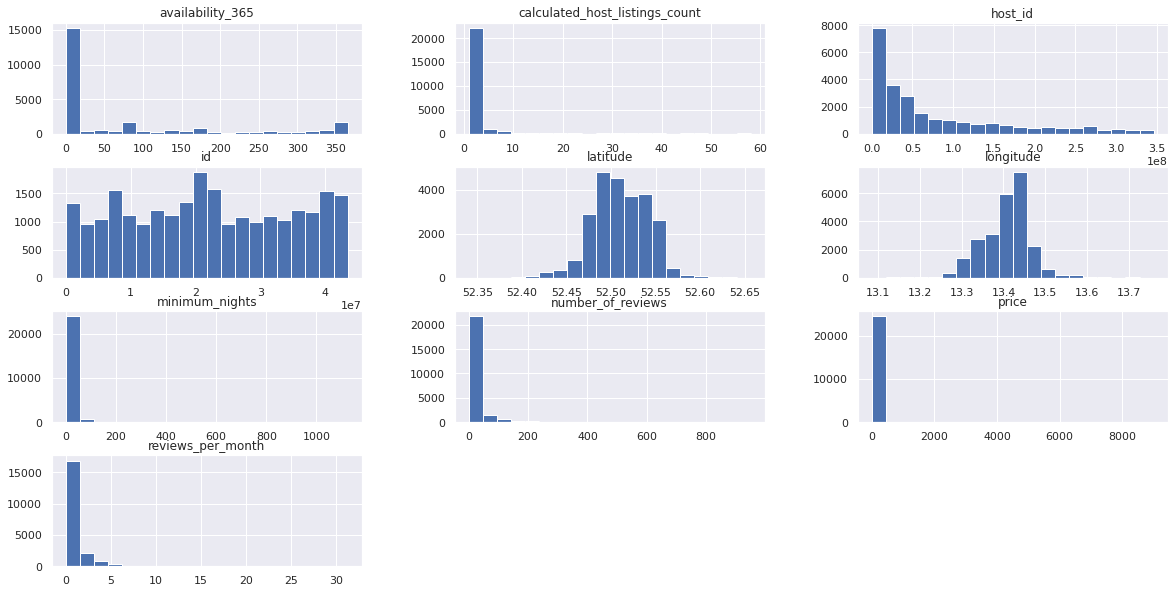

In [6]:
sns.set()
df.hist(bins=20, figsize=(20,10))
plt.show()

Alguns histogramas apresentam um comportamento anormal como nas variáveis 'price' e 'minimum_nights' . Isso pode indicar a presença de outliers, que em pequena quantidade conseguem mudar completamente métricas associadas à nossa análise. Dito isso, vamos utilizar boxplots para verificar e posteriormente limpar nosso dataset de outliers.

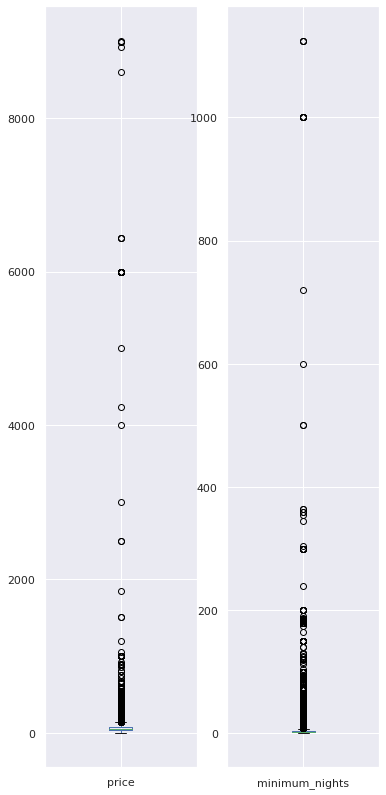

In [7]:
out=['price','minimum_nights']
df[out].plot(kind='box',figsize=(6,14),subplots=True)
plt.show()  

A partis dos boxplots podemos notar que a média de preço é menor que 80euros porém existem valores acima de 8000euros por exemplo que poluem nossa análise, assim, vamos desconsiderar preços de aluguel maiores que 250euros e número de noites mínimo maiores que 30dias,para isso criaremos uma cópia do dataframe anterior e retiraremos as linhas tais que o preço é acima de 250 ou o mínimo de estadia seja maior que 30.

In [0]:
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price > 250].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

Agora podemos analisar o histograma do dataset com outliers retirados:

In [9]:
sum(df['price']>250)

388

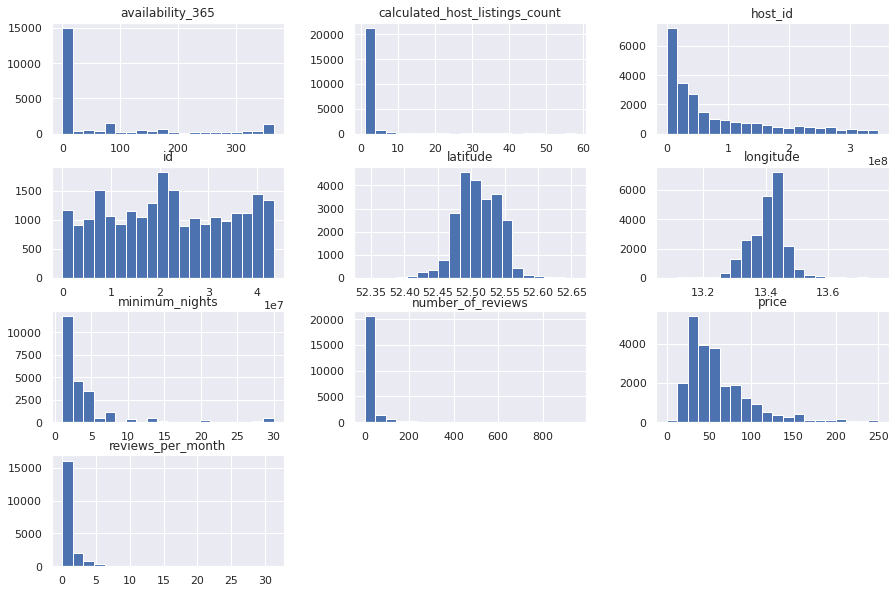

In [10]:
df_clean.hist(bins=20,figsize=(15,10))
plt.show()

### **Qual a média dos preços de aluguel?**

In [11]:
print('A média de preço de aluguel,com outliers, é igual a {} euros'.format(df.price.mean()))
print('A média de preço de aluguel,sem outliers, é igual a {} euros'.format(df_clean.price.mean()))

A média de preço de aluguel,com outliers, é igual a 75.10940919037199 euros
A média de preço de aluguel,sem outliers, é igual a 60.67692833931931 euros


Então a presença de 388 locações criavam uma diferença de média de 15 euros em relação ao total sem elas, vale lembrar que o dataset possuia 24600 entradas, assim, menos de 1,5% da amostra criava uma diferença total de 25% na média.

### **Verificando a correlação existente entre as variáveis**

A seguir vamos mostrar a matriz de correlação entre as variáveis, lembrando que correlação>0 entre A e B indica que A cresce se B cresce em certa proporção e correlação<0 indica que A cresce se B diminui.

In [12]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.032197,0.087103,0.106054,0.164483,0.231927
minimum_nights,-0.032197,1.000000,-0.091984,-0.139354,0.057382,0.057483
number_of_reviews,0.087103,-0.091984,1.000000,0.751491,0.079179,0.284651
reviews_per_month,0.106054,-0.139354,0.751491,1.000000,0.143884,0.299579
calculated_host_listings_count,0.164483,0.057382,0.079179,0.143884,1.000000,0.277913
availability_365,0.231927,0.057483,0.284651,0.299579,0.277913,1.000000


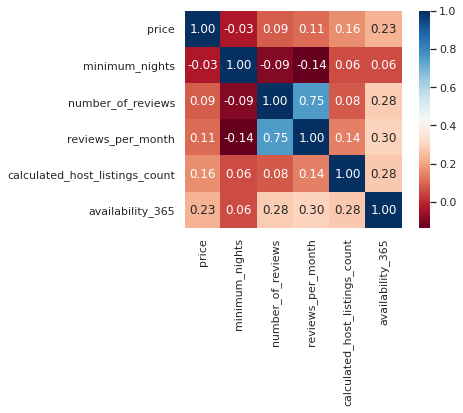

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

Vamos ver qual tipo de acomodação que mais é disponibilizada na plataforma e em seguida calcular o preço médio decada tipo.

In [14]:
df_clean.room_type.value_counts()


Entire home/apt    11733
Private room       11204
Shared room          294
Hotel room           157
Name: room_type, dtype: int64

In [15]:
df_clean.groupby('room_type')['price'].mean()

room_type
Entire home/apt     79.726839
Hotel room         120.694268
Private room        40.299804
Shared room         44.928571
Name: price, dtype: float64

* Podemos ver que enquanto o preço médio de um quarto de hotel é 120euros e o de um quarto compartilhado é 44 euros, existem discordâncias com a realidade, como o preço de um quarto privativo é menor, em média, que um quarto compartilhado?

Isso acontece pois a nossa amostra de quartos compartilhados e hotéis é mais de 40 vezes menor que a quantidade de informações acerca de quartos individuais por exemplo, uma hipótese para isso é que os quartos compartilhados sejam mais comuns em zonas turísticas da cidade, assim, o custo é consideravelmente maior e os quartos individuais podem estar bem espalhados pela cidade, incluindo tanto áreas mais caras quanto áreas mais baratas de tal modo que sua média diminua por essas últimas.
A seguir, vamos calcular a porcentagem, em relação aos dados sem outliers, de tipos de imóveis no Airbnb.

In [16]:
(df_clean.room_type.value_counts())*100/df_clean.shape[0]



Entire home/apt    50.166752
Private room       47.904909
Shared room         1.257055
Hotel room          0.671284
Name: room_type, dtype: float64

Enquanto quartos individuais representam 47% dos nossos dados, quartos compartilhados representam apenas 1.25% o que pode nos "enganar" a respeito de que tipo de imóvel o aluguel é mais barato.

### **Qual a localidade mais cara de Berlim?**



A célula abaixo indica que temos imóveis de 136 bairros distintos de Berlim, porém a cidade possui diversas divisões e alguns destes bairros listados abaixo não pertencem a demarcações oficiais da cidade. Uma solução para analisar os dados por região é levar em consideração os condados ( ou 'Boroughs'), as divisões administrativas da cidade e estão bem definidas na coluna ['neighbourhood_group'].

In [17]:
df_clean.neighbourhood_group.value_counts()

Friedrichshain-Kreuzberg    5474
Mitte                       4864
Pankow                      3697
Neukölln                    3612
Charlottenburg-Wilm.        1656
Tempelhof - Schöneberg      1541
Lichtenberg                  777
Treptow - Köpenick           690
Steglitz - Zehlendorf        472
Reinickendorf                308
Marzahn - Hellersdorf        155
Spandau                      142
Name: neighbourhood_group, dtype: int64

In [18]:
df_clean.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)


neighbourhood_group
Mitte                       67.940584
Pankow                      66.476603
Charlottenburg-Wilm.        64.940217
Spandau                     62.133803
Marzahn - Hellersdorf       61.354839
Friedrichshain-Kreuzberg    60.286628
Tempelhof - Schöneberg      58.865672
Steglitz - Zehlendorf       58.059322
Treptow - Köpenick          54.807246
Lichtenberg                 50.030888
Neukölln                    49.272425
Reinickendorf               46.178571
Name: price, dtype: float64

Podemos ver que mesmo sendo o segundo maior em número de locações, o distrito de Mitte ainda é o com maior preço médio, assim como Pankow com muitas aparições se manteve com a segunda maior média. Então os dados levam a conclusão de que Mitte e Pankow são os distritos mais caros para se alugar em Berlim.

Vamos ver como as localidades estão espalhadas, montando um gráfico através da latitude e longitude de cada imóvel.E para cada local, quanto mais azul na escala de cores mais barata é a acomodação e quanto mais vermelha, mais cara .

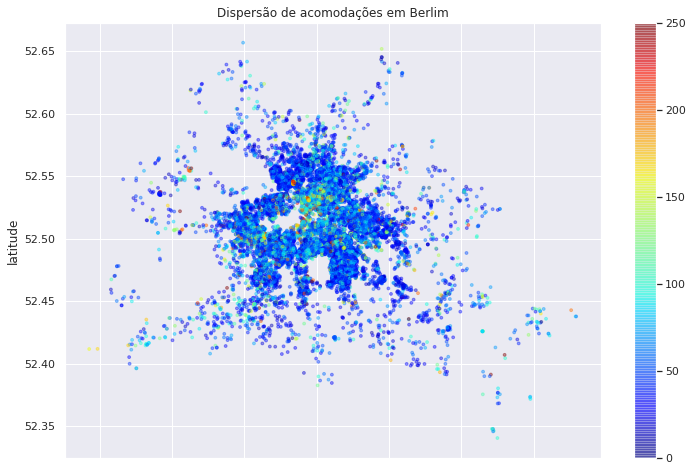

In [19]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8),title='Dispersão de acomodações em Berlim');


### **Qual é a média do mínimo de noites para aluguel ?**

In [20]:
df_clean.minimum_nights.mean()

4.030656747049769

## Conclusões


Podemos retirar informações importantes da análise exploratória realizada como distrito mais caro, estadia mínima dependendo do local e várias outras como, pelo gráfico das coordenadas das acomodações podemos ver por exemplo que a maior parte dos imóveis disponíveis estã na região central de Berlim e quanto mais longe dessa região, em geral, mais barato é a estadia.
Existem, de fato, centenas de conclusões possíveis partindo desse dataset porém para termos mais exatidão nas conclusões tomadas precisariamos de mais características de cada local e um nível mais avançado de manipulação de dados, como é meu primeiro projeto na área, vamos parar por aqui e conforme aprender mais posso aperfeiçoar o modelo.